<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction:" data-toc-modified-id="Introduction:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction:</a></span></li><li><span><a href="#Details" data-toc-modified-id="Details-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Details</a></span></li><li><span><a href="#Properties:-Memoryless" data-toc-modified-id="Properties:-Memoryless-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Properties: Memoryless</a></span></li><li><span><a href="#Mean,-Variance-and-Higher-Moments:" data-toc-modified-id="Mean,-Variance-and-Higher-Moments:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mean, Variance and Higher Moments:</a></span></li><li><span><a href="#Examples:-Failure-of-Electronic-Component" data-toc-modified-id="Examples:-Failure-of-Electronic-Component-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Examples: Failure of Electronic Component</a></span></li><li><span><a href="#Appendix:-Relationship-with-Other-Distribution" data-toc-modified-id="Appendix:-Relationship-with-Other-Distribution-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Appendix: Relationship with Other Distribution</a></span></li></ul></div>

# Exponential Distribution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

from ipywidgets import interact, IntSlider, FloatSlider

%matplotlib inline

### Introduction:

In probability theory and statistics, the **exponential distribution is the probability distribution of the time between events in a Poisson process**, i.e., a process in which events occur continuously and independently at a constant average rate.  
  
The other interpretation of **exponential distribution is a continuous analogue of the geometric distribution**. We use geometric distribution to describe the probability distribution of the number of trial before a certain event happened in a sequence of independent Bernoulli experiments. If a trial takes one unit of time, then the number of trial is just the *‘waiting time’*. We can cut the continuous time into infinite identical intervals and each of them is an independent Bernoulli experiment. In this sense, an exponential distribution is a continuous analogue of the geometric distribution, just like Poisson distribution is a limit of Bernoulli binomial distribution.  

It can be applied to describe   the *'waiting time'* of before something happens:  
* the waiting time between two telephone call
* the life of the electronic component (the waiting time before the breakdown)



### Details
The shape of an exponential distribution depends on the rate parameter $\lambda$, which is the reciprocal of the mean of the distribution. Intuitively, the average waiting time cannot be negative or 0, so its reciprocal rate parameter $\lambda$ shall only be a positive real number. Similarly, because the exponential distribution describes the random variable of 'waiting time', its value can be any non-negative real number.
  
An exponential distribution is a continuous distribution on nonnegative real number ($ x \in [0, +\infty)$), with PMF and CDF as follows:

**PDF:**  
The probability density function (PDF) of exponential distribution with **rate parameter** $\lambda >0$ is a monotone decreasing function given by
  
$$
f(x;\lambda) = \begin{cases} \lambda e ^ {-\lambda x}, &  x \geq 0 \\ \quad0, & \text{otherwise}  \end{cases}
$$
  
  
**CDF:**  
The cumulative distribution function (CDF) is a concave function that can be written in terms of:  
  
$$
F(x;\lambda) = \begin{cases} 1 - e ^ {-\lambda x}, &  x \geq 0 \\ \quad0, & \text{otherwise}  \end{cases}
$$
  
  
**Alternative parametrization:**  
The exponential distribution is sometimes parametrized in terms of the **scale parameter** $\beta = 1/\lambda$:

$$
f(x;\beta) = \begin{cases} \frac{1}{ \beta } e ^ {-x / \beta}, &  x \geq 0 \\ \quad0, & \text{otherwise}  \end{cases}
$$  

**Rate parameter $\lambda$:** The mean and shape of the distribution is determined by the rate parameter $\lambda$, it can take value from $(0, +\infty)$.
  
**Caveat: Exponential Distribution in *scipy.stats*:**  
In scipy.stats, the exponential distribution is defined using the scale parameter $\beta = 1/\lambda$. In this Jupyter Notebook I follows the representation of Durrett (2019) using rate parameter $\lambda$ in math derivation. We should always remember to take the reciprocal of $\lambda$ as the scale parameter when using scipy.stats.
  
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Exponential_probability_density.svg/800px-Exponential_probability_density.svg.png' style="zoom:50%" title="PDF of Exponential Distribution">
  
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Exponential_cdf.svg/800px-Exponential_cdf.svg.png' style="zoom:50%" title="CDF of Exponential Distribution">


In [2]:
def exponential_plot_pdf_cdf(λ):
    erv = st.expon(scale = 1/λ)
    fig, ax = plt.subplots(1, 2, figsize=(9, 6))
    
    xvals = np.linspace(0, 10, 1000)
    ax[0].plot(xvals, erv.pdf(xvals))
    ax[0].set_title("Probability Distribution Function")
    
    xvals = np.linspace(0, 10, 1000)
    ax[1].plot(xvals, erv.cdf(xvals))
    ax[1].set_title("Cumulative Distribution Function")
    
    return None

In [3]:
fs_lambda = FloatSlider(
    value=1, min=0.1, max=5,
    step=0.1, description="Rate $\lambda$",
    style={"description_width": "10%"},
    layout={"width": "80%"}
)

output = interact(exponential_plot_pdf_cdf, λ=fs_lambda)

interactive(children=(FloatSlider(value=1.0, description='Rate $\\lambda$', layout=Layout(width='80%'), max=5.…

### Properties: Memoryless
  
Consider a simple case that waiting time between two telephone call follows an exponential distribution. I have already wait time $s$ after last call, and we are curious about the probability that it will last at least time $r$ before next call, or we are curious about $Prob \{X > r + s | X > s \}$. We can show that:  
  
$$
\begin{aligned}
Prob \{X > r + s | X > s \} &= \frac{Prob \{X > r + s \ and \  X > s \}}{Prob \{ X > s \}} \\
&= \frac{Prob \{X > r + s \}}{Prob \{ X > s \}} \\
&= \frac{e ^ { -\lambda (r + s)}}{e ^ { -\lambda s}} \\
&= e ^ { -\lambda r } \\
&= Prob \{ X > r\}
\end{aligned}
$$
  
  
As we can see $Prob \{X > r + s | X > s \}$ is independent from s, and that means the distribution of waiting time is independent from how much time we have already waiting before. Actually, we have theorem:  
  
**Theorem (Memoryless of exponential distribution):**  
A nonnegative continuous random variable X follows an exponential distribution **if and only if** for any real number r and s:  
$$
Prob \{X > r + s | X > s \} = Prob \{ X > r\}
$$
  
The proof of only if direction have already been shown before.  The memoryless property of the exponential distribution follows directly from its relation to a Poisson process, and you can refer to Durrett (2019) for a more detailed explanation.  
  


In [4]:
# !pip install prettytable

In [5]:
# We can check the memoryless by simple codes
import prettytable as pt

# rate parameter is 2, or scale parameter equals to 0.5
λ = 2 
erv = st.expon(scale = 1/λ)

# consider r = 0.5, 1,and 2, while s = 1.
r = np.array([0.5, 1, 2])
s = 1

# calculate the left hand side and right hand side of the above equation
lhs = np.round((1 - erv.cdf(r + s))/ (1 - erv.cdf(s)), 5)
rhs = np.round(1 - erv.cdf(r), 5)

# table the outcomes
tb = pt.PrettyTable()
tb.field_names = [ ' ','Prob(x=0.5)', 'Prob(x=1)', 'Prob(x=2)']
tb.add_row( ['Left Hand Side', lhs[0], lhs[1], lhs[2]] )
tb.add_row(['Right Hand Side ', rhs[0], rhs[1], rhs[2]] )
print(tb)

+------------------+-------------+-----------+-----------+
|                  | Prob(x=0.5) | Prob(x=1) | Prob(x=2) |
+------------------+-------------+-----------+-----------+
|  Left Hand Side  |   0.36788   |  0.13534  |  0.01832  |
| Right Hand Side  |   0.36788   |  0.13534  |  0.01832  |
+------------------+-------------+-----------+-----------+


###  Mean, Variance and Higher Moments: 
**1. Mean**:  
$$
\mu = EX = \int _{-\infty }^{+\infty } x f(x; \lambda) dx = \int _{0}^{+\infty } \lambda x e ^ {-\lambda x} dx = \frac{1}{ \lambda }
$$

In [6]:
lam_vec = np.array([0.25, 0.5, 1, 2, 5])
for lam in lam_vec:
    erv = st.expon(scale = 1/lam)
    print(f'Exponential distribution with rate parameter λ = {lam} has mean = {erv.mean()}.')

Exponential distribution with rate parameter λ = 0.25 has mean = 4.0.
Exponential distribution with rate parameter λ = 0.5 has mean = 2.0.
Exponential distribution with rate parameter λ = 1.0 has mean = 1.0.
Exponential distribution with rate parameter λ = 2.0 has mean = 0.5.
Exponential distribution with rate parameter λ = 5.0 has mean = 0.2.


**2. Variance**:  
$$
\sigma^2 = DX = E(X^2) - (EX)^2 = \int _{0}^{+\infty } \lambda x^2 e ^ {-\lambda x} dx - \frac{1}{ \lambda^2 } = \frac{1}{ \lambda^2 }
$$

In [7]:
lam_vec = np.array([0.25, 0.5, 1, 2, 5])
for lam in lam_vec:
    erv = st.expon(scale = 1/lam)
    print(f'Exponential distribution with rate parameter λ = {lam} has variance = {erv.var()}.')

Exponential distribution with rate parameter λ = 0.25 has variance = 16.0.
Exponential distribution with rate parameter λ = 0.5 has variance = 4.0.
Exponential distribution with rate parameter λ = 1.0 has variance = 1.0.
Exponential distribution with rate parameter λ = 2.0 has variance = 0.25.
Exponential distribution with rate parameter λ = 5.0 has variance = 0.04000000000000001.


**2. Skewness, Kurtosis and Higher Moments**   
  
**Skewness**
$$
\tilde{\mu_3}= Skew(X) = E \bigg[ \bigg(\frac{X - \mu}{\sigma} \bigg)^3 \bigg] = \frac{E(X^3) - 3 \mu \sigma^2 - 3 \mu^3}{\sigma^3} = 2
$$  
  
**Kurtosis and Excessive Kurtosis**
$$
\tilde{\mu_4}= Kurt(X) = E \bigg[ \bigg(\frac{X - \mu}{\sigma} \bigg)^4 \bigg] = 9 \\
Ex. Kurt(X) = Kurt(X) - 3 = 6 
$$

**Higher Moments**
$$
E[X ^ n] = \frac{n!}{\lambda^n}
$$


### Examples: Failure of Electronic Component

  
An electronic component can on average serve for 1000 hours, and the failure of the component occurs continuously and independently at the same rate, then: 
  
What is the probability that one electronic component can serve more than 500 hours?  


**Analytical Result:**

Because the failure occurs continuously and independently, we know it follows an exponential distribution, in which rate parameter is given by:

$$
\lambda  = \frac{1}{ EX } = 0.001
$$

CDF is given by:

$$
F(x;\lambda = 0.001) = \begin{cases} 1 - e ^ {-0.001x} &  x \geq 0 \\ \quad0, & \text{otherwise}  \end{cases}
$$

Thus, the probability that one electronic component can work more than 500 hours is:

$$
Prob \{X > 500\} = 1- Prob \{X \leq 500\} = 1 - F(500; \lambda = 0.001) = e ^ {-0.5}
$$


**Simulation Result:**

In [8]:
# define the exponential distribution
λ = 0.001
erv = st.expon(scale = 1/λ)

We could take a single draw from this distribution to determine whether it work more than 500 hours.

In [9]:
break_time = erv.rvs()
print(break_time)
break_time >= 500

485.362400639555


False

In [10]:
# check the mean of the distribution
erv.mean()

1000.0

In [11]:
# check the variance of the distribution
erv.var()

1000000.0

We can solve the problem using a Monte Carlo simulation. Consider a huge amount of independent identical components. The frequency shall converge to the probability according to the law of large number.

In [12]:
sim_size = 1000000
samples = erv.rvs(sim_size)

print(f'Among {sim_size} times simulation, it success {np.sum(samples >= 500)}.')
print(f'The probability calculate from the Monte Carlo simulation is {np.mean(samples >= 500)}.')
print(f'The analytical result is {np.exp(-0.5)}.')


Among 1000000 times simulation, it success 605621.
The probability calculate from the Monte Carlo simulation is 0.605621.
The analytical result is 0.6065306597126334.


As we can see from the result, the Monte Carlo simulation give a pretty precise result.

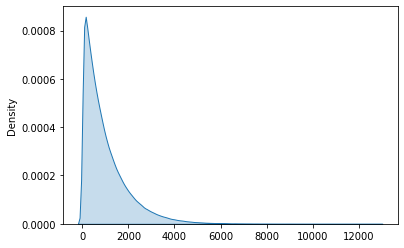

In [13]:
import seaborn as sns

sns.kdeplot(samples,shade=True)
plt.show()

### Appendix: Relationship with Other Distribution

<img src='./graph/relation.png' style="zoom:80%">
  
**1. Exponential Distribution as *'Inverse'* of the Poisson Distribution**:   
Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event. A Poisson distribution with rate parameter $\lambda \in (0,+ \infty)$ has possibility mass function (PMF):  
  
$$
f(k; \lambda) = Prob \{X = k \} = \frac{ \lambda^k e ^{-\lambda} }{ k! } , \ k =0, 1, 2, 3... 
$$
  
However, an exponential distribution is given inversely, that is, given two occurring events, we define the probability distribution of waiting time as an exponential distribution:
  

  
**2. Exponential Distribution as Continuous Analogue of the Geometric Distribution**:   
As we have already introduce before, we use geometric distribution to describe the probability distribution of the number of failure $k$ before a certain event happened, in a sequence of independent Bernoulli experiments with probability of success $p \in [0, 1]$. 
  
$$
f(k; p) = Prob \{X = k \} = (1 - p) ^ k p , \ k =0, 1, 2, 3... 
$$
  
  
If a trial takes one unit of time, then the number of trial is just the ‘waiting time’. We can cut the continuous time into infinite identical intervals and each of them is an independent Bernoulli experiment. In this sense, an exponential distribution is a continuous analogue of the geometric distribution, just like Poisson distribution is a limit of Bernoulli binomial distribution.
  

**3. Exponential Distribution as Special Case of Gamma Distribution with $\alpha = 1$**:   

A gamma distribution is defined as a continuous distribution with PDF as follow, where shape parameter is $\alpha \in (0, +\infty)$ and rate parameter is $\lambda \in (0, +\infty)$: 
  
$$
f(x; \alpha, \lambda) = \begin{cases} \frac{ \beta ^ \alpha}{ \Gamma(\alpha) } x ^ { \alpha - 1 } e ^ { -\lambda x } , &  x \geq 0 \\ \quad0, & \text{otherwise}  \end{cases}
$$
  
  
or with CDF as follow:  
  
$$
F(x; \alpha, \lambda) = \begin{cases} \frac{1}{ \Gamma(\alpha) } \gamma(\alpha, \lambda x) , &  x \geq 0 \\ \quad0, & \text{otherwise}  \end{cases}
$$
  
  
By taking the shape parameter $\alpha = 1$, we can find the gamma distribution degenerates to the exponential distribution.

**4. Exponential Distribution as Special Case of Weibull distribution with $k = 1$:**

A Weibull distribution is defined as a continuous distribution with PDF as follows, where scale parameter is $\beta \in (0, +\infty)$ and shape parameter is $k \in (0, +\infty) $: 

$$
f(x; \beta, k) = \begin{cases} \frac{k}{\beta} (\frac{x}{\beta})^{k-1} e ^ { -(x/\beta)^k } , &  x \geq 0 \\ \quad0, & \text{otherwise}  \end{cases}
$$
  
  
or with CDF as follow:  
  
$$
F(x; \beta, k) = \begin{cases} 1 - e ^ {-(x/\beta)^k}, &  x \geq 0 \\ \quad0, & \text{otherwise}  \end{cases}
$$
  
  
By thaking the shape parameter $k = 1$, we can find the Weibull distribution degenerates to the exponential distribution.

**Note**: In creating this notebook, I referenced the "Distribution Explorer" material found at https://distribution-explorer.github.io/index.html, wikipedia https://en.wikipedia.org/wiki/Exponential_distribution, and *Durrett, R. (2019). Probability: theory and examples. Cambridge university press.* I certainly encourage others to find additional information there.